Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#### This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images

data_dir_train = pathlib.Path("C:/Users/sjayapal/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("C:/Users/sjayapal/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

#### Create a code to visualize one instance of all the nine classes present in the dataset

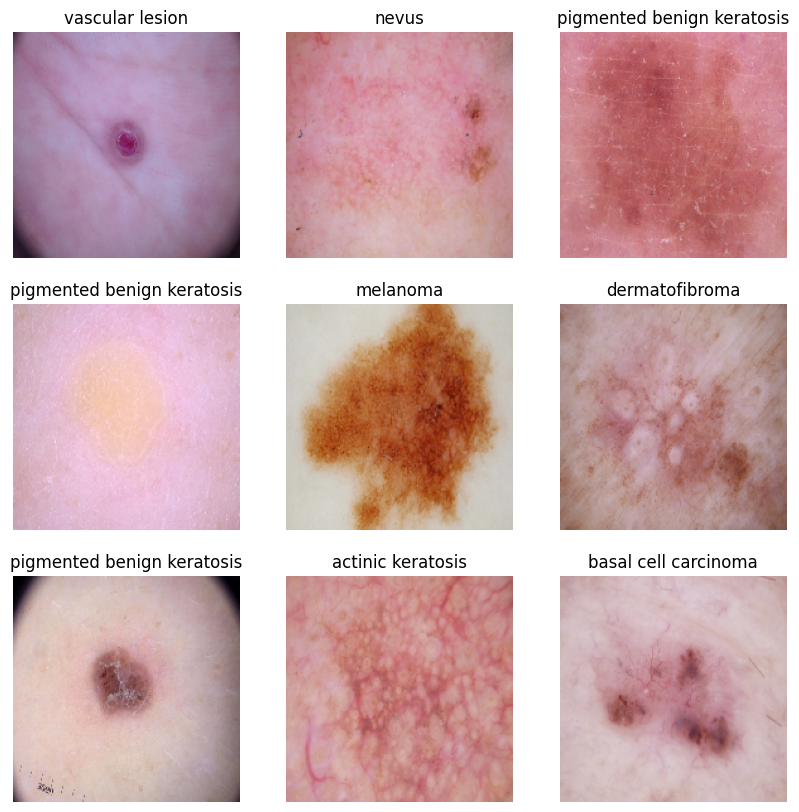

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [11]:
### Your code goes here

# Number of target labels are 9
target_labels = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

## Compile the model

#### Choose an appropirate optimiser and loss function for model training

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the Model

In [14]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 19s 281ms/step - loss: 2.0611 - accuracy: 0.2651 - val_loss: 1.8237 - val_accuracy: 0.3199
Epoch 2/20
56/56 [==============================] - 15s 270ms/step - loss: 1.6881 - accuracy: 0.3940 - val_loss: 1.5656 - val_accuracy: 0.4698
Epoch 3/20
56/56 [==============================] - 15s 275ms/step - loss: 1.4677 - accuracy: 0.4827 - val_loss: 1.4610 - val_accuracy: 0.5011
Epoch 4/20
56/56 [==============================] - 15s 275ms/step - loss: 1.4036 - accuracy: 0.5218 - val_loss: 1.3441 - val_accuracy: 0.5459
Epoch 5/20
56/56 [==============================] - 16s 280ms/step - loss: 1.2758 - accuracy: 0.5597 - val_loss: 1.4369 - val_accuracy: 0.4944
Epoch 6/20
56/56 [==============================] - 16s 279ms/step - loss: 1.2004 - accuracy: 0.5792 - val_loss: 1.3908 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 16s 282ms/step - loss: 1.1180 - accuracy: 0.6071 - val_loss: 1.3481 - val_accuracy: 0.5257

### Visualizing training results

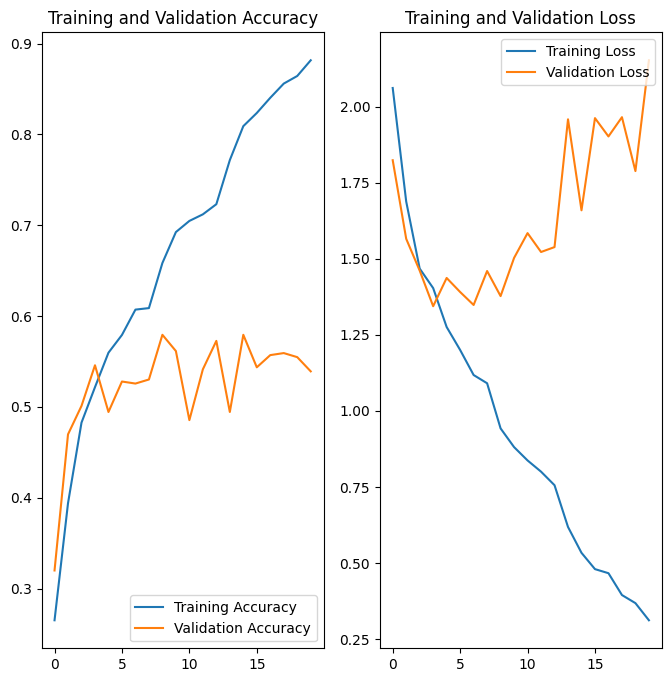

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Please find my analysis below

<b> Observations:</b>

1) The model's training accuracy shows a steady increase of upto 90%, while validation accuracy remains consistently around 55%.

2) A high training accuracy suggests the model has effectively captured the noise within the data. However, its poor performance on validation data indicates a lack of generalizability.

3) These observations confirm the presence of overfitting. To address this issue, augmentation techniques will be employed. Given the limited training data available, new samples will be generated by making slight modifications to existing data (such as horizontal/vertical image flipping, minor image rotations, etc.), which will then be used for training the model.

In [16]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

augmentation_data = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])

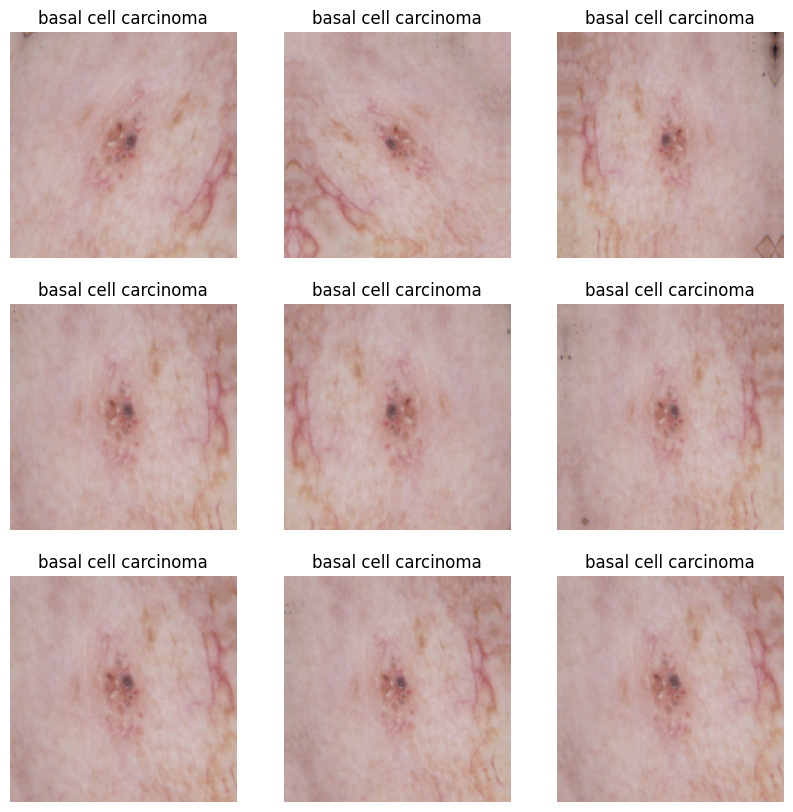

In [17]:
# Visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

### Create the model, compile and train the model

In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  augmentation_data,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

### Compiling the model

In [19]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training Model

In [20]:
%%time
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 18s 300ms/step - loss: 2.0687 - accuracy: 0.2506 - val_loss: 1.8167 - val_accuracy: 0.3602
Epoch 2/20
56/56 [==============================] - 17s 308ms/step - loss: 1.7255 - accuracy: 0.3661 - val_loss: 1.7419 - val_accuracy: 0.3826
Epoch 3/20
56/56 [==============================] - 18s 314ms/step - loss: 1.6143 - accuracy: 0.4174 - val_loss: 1.4967 - val_accuracy: 0.4676
Epoch 4/20
56/56 [==============================] - 18s 317ms/step - loss: 1.5440 - accuracy: 0.4487 - val_loss: 1.7623 - val_accuracy: 0.3468
Epoch 5/20
56/56 [==============================] - 18s 321ms/step - loss: 1.5149 - accuracy: 0.4682 - val_loss: 1.4218 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 18s 325ms/step - loss: 1.3769 - accuracy: 0.5022 - val_loss: 1.3979 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 18s 327ms/step - loss: 1.3188 - accuracy: 0.5212 - val_loss: 1.3987 - val_accuracy: 0.5235

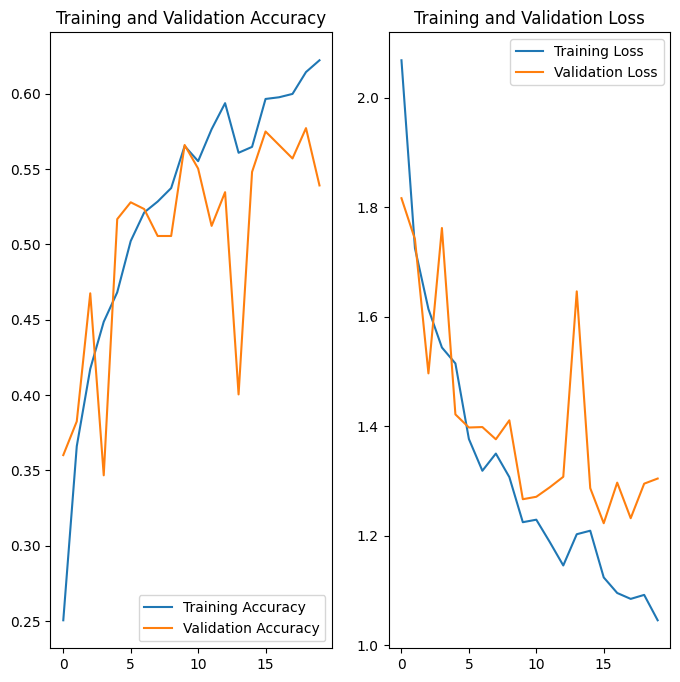

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<b> Observations from above representation:</b>

1.By leveraging augmented data, overfitting has been effectively addressed.

2.The training and validation accuracy of the aforementioned model fall within a similar range.

3.Both the training and validation data are showing poor performance, indicating that the model is now exhibiting underfitting.

### Find the distribution of classes in the training dataset.
#### Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
## Your code goes here.

from glob import glob

## find the image path for all class labels (lesions)
images_path_list = [ i for i in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]

## Extract the class labels (lesions)
lesions_list = [ os.path.basename(os.path.dirname(j)) for j in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesions_list))

2239


In [23]:
# Extract image path and class label in a dictionary
image_dict = dict(zip(images_path_list, lesions_list))
print(list(image_dict.items())[:5])

[('C:\\Users\\sjayapal\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg', 'actinic keratosis'), ('C:\\Users\\sjayapal\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg', 'actinic keratosis'), ('C:\\Users\\sjayapal\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025825.jpg', 'actinic keratosis'), ('C:\\Users\\sjayapal\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025953.jpg', 'actinic keratosis'), ('C:\\Users\\sjayapal\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025957.jpg', 'actinic keratosis')]


In [24]:
# View the image path and class label in a df
lesions_df = pd.DataFrame(list(image_dict.items()), columns=['Image Path', 'Label'])
lesions_df.head()

,Image Path,Label
0,C:\Users\sjayapal\Downloads\CNN_assignment\Ski...,actinic keratosis
1,C:\Users\sjayapal\Downloads\CNN_assignment\Ski...,actinic keratosis
2,C:\Users\sjayapal\Downloads\CNN_assignment\Ski...,actinic keratosis
3,C:\Users\sjayapal\Downloads\CNN_assignment\Ski...,actinic keratosis
4,C:\Users\sjayapal\Downloads\CNN_assignment\Ski...,actinic keratosis


In [25]:
## Inspecting the distribution of classes in the data
lesions_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

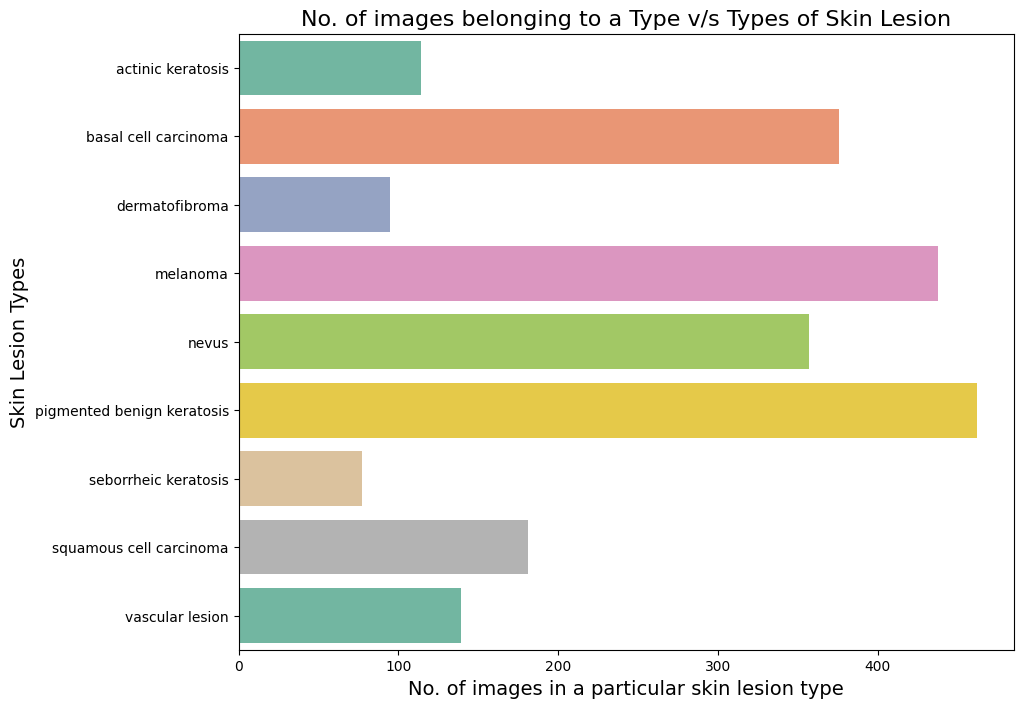

In [36]:
# Visualize the distribution of classes using a countplot

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


plt.figure(figsize=(10, 8))
sns.countplot(y="Label", data=lesions_df , palette = "Set2")

plt.title('No. of images belonging to a Type v/s Types of Skin Lesion', fontsize=16)
plt.xlabel('No. of images in a particular skin lesion type', fontsize=14)
plt.ylabel('Skin Lesion Types', fontsize=14)
plt.show()

In [37]:
round(lesions_df[['Label']].value_counts(normalize=True)*100, 2)

Label                     
pigmented benign keratosis    20.63
melanoma                      19.56
basal cell carcinoma          16.79
nevus                         15.94
squamous cell carcinoma        8.08
vascular lesion                6.21
actinic keratosis              5.09
dermatofibroma                 4.24
seborrheic keratosis           3.44
Name: proportion, dtype: float64

### Write your findings here:
##### - Which class has the least number of samples?
##### - Which classes dominate the data in terms proportionate number of samples?

<b> Observations:</b>

1. A clear class imbalance is evident within the training data.

2. The class "seborrheic keratosis" comprises the smallest proportion of samples, accounting for approximately 3.44%.

3. "Pigmented benign keratosis" and "melanoma" significantly outweigh other classes, representing approximately 20.63% and 19.56% of the data, respectively.

#### Rectify the class imbalance
##### Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

<b> To use Augmentor, the following general procedure is followed:</b>

- Instantiate a Pipeline object pointing to a directory containing your initial image data set.
- Define a number of operations to perform on this data set using your Pipeline object.
- Execute these operations by calling the Pipeline’s sample() method.

In [38]:
path_to_training_dataset = str(data_dir_train) + '/'

import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\sjayapal\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2339D757E90>: 100%|██████████| 500/500 [00:02<00:00, 203.18 Samples/s]


Initialised with 376 image(s) found.
Output directory set to C:\Users\sjayapal\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x233A32D3210>: 100%|██████████| 500/500 [00:02<00:00, 187.11 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:\Users\sjayapal\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x233A3399DD0>: 100%|██████████| 500/500 [00:02<00:00, 179.93 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:\Users\sjayapal\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x233A58E6050>: 100%|██████████| 500/500 [00:14<00:00, 35.23 Samples/s]


Initialised with 357 image(s) found.
Output directory set to C:\Users\sjayapal\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x233A58EDB90>: 100%|██████████| 500/500 [00:12<00:00, 41.03 Samples/s]  


Initialised with 462 image(s) found.
Output directory set to C:\Users\sjayapal\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x233D38E6CD0>: 100%|██████████| 500/500 [00:02<00:00, 175.62 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:\Users\sjayapal\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x233A3266410>: 100%|██████████| 500/500 [00:06<00:00, 73.86 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:\Users\sjayapal\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x233A3279F50>: 100%|██████████| 500/500 [00:02<00:00, 176.66 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:\Users\sjayapal\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x233D3580790>: 100%|██████████| 500/500 [00:02<00:00, 175.20 Samples/s]                  


##### Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [39]:
# Verifying the total count of images after the augmentation
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


#### Lets see the distribution of augmented data after adding new images to the original training data.

In [40]:
# extracting the augmented image paths in a list
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:5]

['C:\\Users\\sjayapal\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1cc27e03-b7ba-4956-97c5-f4fac8f5be4a.jpg',
 'C:\\Users\\sjayapal\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_33168770-7e00-4ff3-b5c5-d7837614ffc3.jpg',
 'C:\\Users\\sjayapal\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_ab212c7e-8847-4448-9993-9d3e910dd221.jpg',
 'C:\\Users\\sjayapal\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_e30e8b5d-f80a-4612-97ff-03a965a29435.jpg',
 'C:\\Users\\sjayapal\\Downloads\\CNN_assignment\\Skin cancer IS

In [41]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [42]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [49]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Image Path','Label'])
new_df = pd.concat([lesions_df,df2])
new_df.shape

(6739, 2)

In [50]:
# View the augmented image paths and labels in a new df
new_df.head()

,Image Path,Label
0,C:\Users\sjayapal\Downloads\CNN_assignment\Ski...,actinic keratosis
1,C:\Users\sjayapal\Downloads\CNN_assignment\Ski...,actinic keratosis
2,C:\Users\sjayapal\Downloads\CNN_assignment\Ski...,actinic keratosis
3,C:\Users\sjayapal\Downloads\CNN_assignment\Ski...,actinic keratosis
4,C:\Users\sjayapal\Downloads\CNN_assignment\Ski...,actinic keratosis


In [51]:
# Inspecting the classes after adding 500 samples per label
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

In [52]:
# Inspecting the classes (% age wise) after adding 500 samples per label
round(new_df['Label'].value_counts(normalize=True)*100, 2)

Label
pigmented benign keratosis    14.28
melanoma                      13.92
basal cell carcinoma          13.00
nevus                         12.72
squamous cell carcinoma       10.11
vascular lesion                9.48
actinic keratosis              9.11
dermatofibroma                 8.83
seborrheic keratosis           8.56
Name: proportion, dtype: float64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Train the model on the data created using Augmentor

In [53]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [54]:
# data_dir_train="path to directory with training data + data created using augmentor"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [55]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Create your model (make sure to include normalization)

In [56]:
## your code goes here

model = Sequential([
  augmentation_data,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

### Compile your model (Choose optimizer and loss function appropriately)

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train your model

In [58]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 77s 444ms/step - loss: 2.3386 - accuracy: 0.2899 - val_loss: 31.1620 - val_accuracy: 0.1151
Epoch 2/20
169/169 [==============================] - 78s 463ms/step - loss: 1.7006 - accuracy: 0.3192 - val_loss: 22.2123 - val_accuracy: 0.1745
Epoch 3/20
169/169 [==============================] - 81s 475ms/step - loss: 1.6332 - accuracy: 0.3618 - val_loss: 2.2549 - val_accuracy: 0.3667
Epoch 4/20
169/169 [==============================] - 81s 478ms/step - loss: 1.5853 - accuracy: 0.3915 - val_loss: 1.6239 - val_accuracy: 0.4009
Epoch 5/20
169/169 [==============================] - 83s 487ms/step - loss: 1.5139 - accuracy: 0.4240 - val_loss: 2.9375 - val_accuracy: 0.3177
Epoch 6/20
169/169 [==============================] - 84s 495ms/step - loss: 1.4960 - accuracy: 0.4299 - val_loss: 5.8249 - val_accuracy: 0.2309
Epoch 7/20
169/169 [==============================] - 85s 501ms/step - loss: 1.4414 - accuracy: 0.4520 - val_loss: 6.1386 - val_

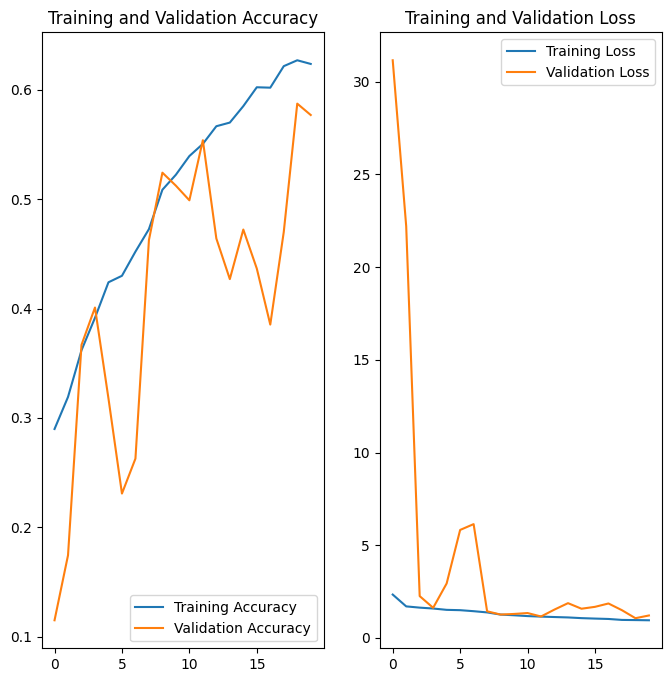

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<b> Observations: </b>

1. Implementing batch normalization in the model yielded a slight uptick in both training and validation accuracy.
2. Formulating an alternative model without batch normalization aims to investigate prospective improvements in accuracy.

### Creating another model (without batch normalization)

In [60]:
# create the model
model = Sequential([
  augmentation_data,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

### Compiling the model

In [61]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# ModelCheckpoint callback is employed alongside the model.fit() training process to periodically save the model
# or its weights (in a checkpoint file)
checkpoint = ModelCheckpoint("model.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

# Early stop the training when a monitored metric ceases to show improvement
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

### Training the model

In [63]:
%%time
# train the model

callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/50
169/169 [==============================] - ETA: 0s - loss: 1.4738 - accuracy: 0.4340INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 57s 336ms/step - loss: 1.4738 - accuracy: 0.4340 - val_loss: 1.4452 - val_accuracy: 0.4603
Epoch 2/50
169/169 [==============================] - ETA: 0s - loss: 1.3863 - accuracy: 0.4740INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 61s 361ms/step - loss: 1.3863 - accuracy: 0.4740 - val_loss: 1.3423 - val_accuracy: 0.4922
Epoch 3/50
169/169 [==============================] - ETA: 0s - loss: 1.3024 - accuracy: 0.5050INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 63s 371ms/step - loss: 1.3024 - accuracy: 0.5050 - val_loss: 1.2561 - val_accuracy: 0.5219
Epoch 4/50
169/169 [==============================] - 62s 365ms/step - loss: 1.2554 - accuracy: 0.5258 - val_loss: 1.2856 - val_accuracy: 0.5108
Epoch 5/50
169/169 [==============================] - ETA: 0s - loss: 1.1961 - accuracy: 0.5414INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 65s 381ms/step - loss: 1.1961 - accuracy: 0.5414 - val_loss: 1.1327 - val_accuracy: 0.5679
Epoch 6/50
169/169 [==============================] - ETA: 0s - loss: 1.1453 - accuracy: 0.5651INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 65s 383ms/step - loss: 1.1453 - accuracy: 0.5651 - val_loss: 1.1313 - val_accuracy: 0.5724
Epoch 7/50
169/169 [==============================] - 63s 369ms/step - loss: 1.1028 - accuracy: 0.5751 - val_loss: 1.1431 - val_accuracy: 0.5694
Epoch 8/50
169/169 [==============================] - ETA: 0s - loss: 1.0835 - accuracy: 0.5896INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 66s 388ms/step - loss: 1.0835 - accuracy: 0.5896 - val_loss: 1.0243 - val_accuracy: 0.6065
Epoch 9/50
169/169 [==============================] - 64s 375ms/step - loss: 1.0625 - accuracy: 0.5953 - val_loss: 1.0437 - val_accuracy: 0.6244
Epoch 10/50
169/169 [==============================] - ETA: 0s - loss: 0.9771 - accuracy: 0.6326INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 67s 396ms/step - loss: 0.9771 - accuracy: 0.6326 - val_loss: 0.9999 - val_accuracy: 0.6459
Epoch 11/50
169/169 [==============================] - ETA: 0s - loss: 0.9767 - accuracy: 0.6307INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 72s 425ms/step - loss: 0.9767 - accuracy: 0.6307 - val_loss: 0.9728 - val_accuracy: 0.6347
Epoch 12/50
169/169 [==============================] - ETA: 0s - loss: 0.9172 - accuracy: 0.6608INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 78s 458ms/step - loss: 0.9172 - accuracy: 0.6608 - val_loss: 0.9281 - val_accuracy: 0.6526
Epoch 13/50
169/169 [==============================] - ETA: 0s - loss: 0.8875 - accuracy: 0.6690INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 76s 450ms/step - loss: 0.8875 - accuracy: 0.6690 - val_loss: 0.9270 - val_accuracy: 0.6704
Epoch 14/50
169/169 [==============================] - 70s 411ms/step - loss: 0.8801 - accuracy: 0.6688 - val_loss: 0.9800 - val_accuracy: 0.6466
Epoch 15/50
169/169 [==============================] - ETA: 0s - loss: 0.8388 - accuracy: 0.6845INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 72s 425ms/step - loss: 0.8388 - accuracy: 0.6845 - val_loss: 0.8734 - val_accuracy: 0.6733
Epoch 16/50
169/169 [==============================] - ETA: 0s - loss: 0.7880 - accuracy: 0.7094INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 73s 428ms/step - loss: 0.7880 - accuracy: 0.7094 - val_loss: 0.8439 - val_accuracy: 0.6889
Epoch 17/50
169/169 [==============================] - 72s 425ms/step - loss: 0.7690 - accuracy: 0.7131 - val_loss: 0.8503 - val_accuracy: 0.6971
Epoch 18/50
169/169 [==============================] - ETA: 0s - loss: 0.7246 - accuracy: 0.7270INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 76s 449ms/step - loss: 0.7246 - accuracy: 0.7270 - val_loss: 0.8161 - val_accuracy: 0.7171
Epoch 19/50
169/169 [==============================] - 71s 418ms/step - loss: 0.7669 - accuracy: 0.7174 - val_loss: 0.8246 - val_accuracy: 0.7134
Epoch 20/50
169/169 [==============================] - ETA: 0s - loss: 0.6991 - accuracy: 0.7394INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 75s 442ms/step - loss: 0.6991 - accuracy: 0.7394 - val_loss: 0.7483 - val_accuracy: 0.7268
Epoch 21/50
169/169 [==============================] - 72s 424ms/step - loss: 0.6484 - accuracy: 0.7591 - val_loss: 0.8263 - val_accuracy: 0.7201
Epoch 22/50
169/169 [==============================] - ETA: 0s - loss: 0.6651 - accuracy: 0.7457INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 79s 465ms/step - loss: 0.6651 - accuracy: 0.7457 - val_loss: 0.6918 - val_accuracy: 0.7565
Epoch 23/50
169/169 [==============================] - 75s 442ms/step - loss: 0.6276 - accuracy: 0.7713 - val_loss: 0.7024 - val_accuracy: 0.7572
Epoch 24/50
169/169 [==============================] - ETA: 0s - loss: 0.6072 - accuracy: 0.7715INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 75s 440ms/step - loss: 0.6072 - accuracy: 0.7715 - val_loss: 0.6914 - val_accuracy: 0.7765
Epoch 25/50
169/169 [==============================] - ETA: 0s - loss: 0.6086 - accuracy: 0.7750INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 74s 433ms/step - loss: 0.6086 - accuracy: 0.7750 - val_loss: 0.6688 - val_accuracy: 0.7721
Epoch 26/50
169/169 [==============================] - 71s 417ms/step - loss: 0.5432 - accuracy: 0.7971 - val_loss: 0.7431 - val_accuracy: 0.7498
Epoch 27/50
169/169 [==============================] - 70s 411ms/step - loss: 0.5453 - accuracy: 0.7997 - val_loss: 0.6766 - val_accuracy: 0.7765
Epoch 28/50
169/169 [==============================] - 70s 411ms/step - loss: 0.5378 - accuracy: 0.8032 - val_loss: 0.7042 - val_accuracy: 0.7713
Epoch 29/50
169/169 [==============================] - ETA: 0s - loss: 0.5170 - accuracy: 0.8060INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 72s 425ms/step - loss: 0.5170 - accuracy: 0.8060 - val_loss: 0.6388 - val_accuracy: 0.7780
Epoch 30/50
169/169 [==============================] - ETA: 0s - loss: 0.5268 - accuracy: 0.8025INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 74s 435ms/step - loss: 0.5268 - accuracy: 0.8025 - val_loss: 0.5823 - val_accuracy: 0.8033
Epoch 31/50
169/169 [==============================] - 69s 405ms/step - loss: 0.5146 - accuracy: 0.8010 - val_loss: 0.6212 - val_accuracy: 0.8010
Epoch 32/50
169/169 [==============================] - 70s 410ms/step - loss: 0.5327 - accuracy: 0.8029 - val_loss: 0.6405 - val_accuracy: 0.7996
Epoch 33/50
169/169 [==============================] - 69s 408ms/step - loss: 0.4886 - accuracy: 0.8216 - val_loss: 0.6699 - val_accuracy: 0.7936
Epoch 34/50
169/169 [==============================] - 69s 404ms/step - loss: 0.4570 - accuracy: 0.8279 - val_loss: 0.7876 - val_accuracy: 0.7595
Epoch 35/50
169/169 [==============================] - ETA: 0s - loss: 0.4836 - accuracy: 0.8207INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 72s 425ms/step - loss: 0.4836 - accuracy: 0.8207 - val_loss: 0.5575 - val_accuracy: 0.8174
Epoch 36/50
169/169 [==============================] - 70s 412ms/step - loss: 0.4704 - accuracy: 0.8275 - val_loss: 0.6366 - val_accuracy: 0.7958
Epoch 37/50
169/169 [==============================] - 71s 415ms/step - loss: 0.4185 - accuracy: 0.8438 - val_loss: 0.6273 - val_accuracy: 0.8203
Epoch 38/50
169/169 [==============================] - 71s 419ms/step - loss: 0.4413 - accuracy: 0.8390 - val_loss: 0.7144 - val_accuracy: 0.7773
Epoch 39/50
169/169 [==============================] - 81s 477ms/step - loss: 0.4578 - accuracy: 0.8323 - val_loss: 0.6225 - val_accuracy: 0.8085
Epoch 40/50
169/169 [==============================] - 89s 522ms/step - loss: 0.4292 - accuracy: 0.8401 - val_loss: 0.6323 - val_accuracy: 0.8062
Epoch 41/50
169/169 [==============================] - 72s 425ms/step - loss: 0.3954 - accuracy: 0.8509 - val_loss: 0.5790 - val_accurac

INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


169/169 [==============================] - 72s 423ms/step - loss: 0.3968 - accuracy: 0.8476 - val_loss: 0.5383 - val_accuracy: 0.8114
Epoch 45/50
169/169 [==============================] - 69s 408ms/step - loss: 0.3740 - accuracy: 0.8648 - val_loss: 0.6048 - val_accuracy: 0.8151
Epoch 46/50
169/169 [==============================] - 69s 405ms/step - loss: 0.3766 - accuracy: 0.8592 - val_loss: 0.5471 - val_accuracy: 0.8270
Epoch 47/50
169/169 [==============================] - 72s 423ms/step - loss: 0.3608 - accuracy: 0.8637 - val_loss: 0.6113 - val_accuracy: 0.8114
Epoch 48/50
169/169 [==============================] - 74s 432ms/step - loss: 0.4034 - accuracy: 0.8494 - val_loss: 0.6113 - val_accuracy: 0.8129
Epoch 49/50
169/169 [==============================] - 78s 461ms/step - loss: 0.3485 - accuracy: 0.8698 - val_loss: 0.5660 - val_accuracy: 0.8285
Epoch 50/50
169/169 [==============================] - 72s 423ms/step - loss: 0.3453 - accuracy: 0.8657 - val_loss: 0.5696 - val_accurac

### Visualize the model results

In [64]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

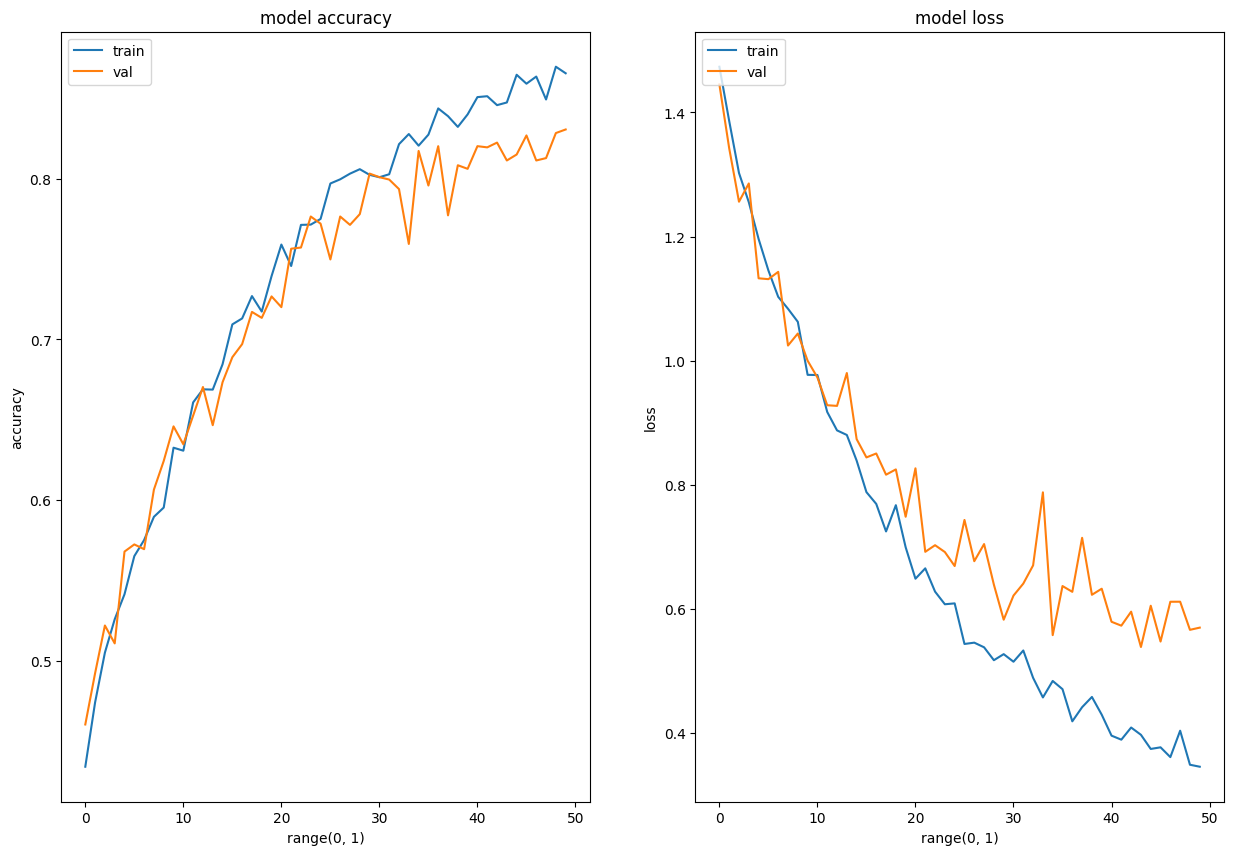

In [65]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<b> Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help? </b>

<b> Observations:</b>

1. The ultimate model showcases well-balanced performance, displaying no signs of underfitting or overfitting.

2. The implementation of class rebalancing has notably enhanced the model's performance across both training and validation datasets.

3. Following 50 epochs, the final model attains an accuracy of 86% on the training set and approximately 79% on the validation set.

4. The narrow divergence between training and validation accuracies underscores the robust generalization capability of the final CNN model.

5. The addition of batch normalization failed to enhance both training and validation accuracy.

### Model Evaluation

1/1 [==============================] - 0s 20ms/step
Actual Class: basal cell carcinoma
Predicted Class: basal cell carcinoma


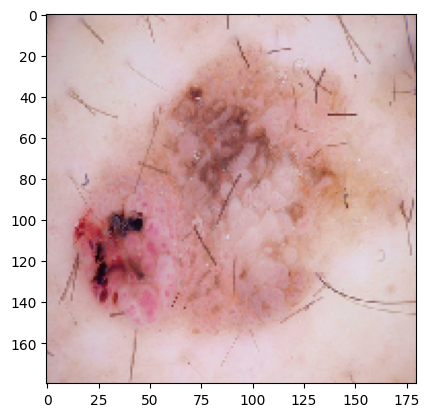

In [83]:
# Evaluating our model on one of the instances in the test set

from tensorflow.keras.preprocessing.image import load_img

image_path_test = os.path.join(data_dir_test, class_names[5], '*')
test_image = glob(image_path_test)
test_image = load_img(test_image[-1], target_size=(180, 180, 3))
plt.imshow(test_image)
plt.grid(False)

img = np.expand_dims(test_image, axis=0)
predicted = model.predict(img)
predicted = np.argmax(predicted)
predicted_class = class_names[predicted]
print("Actual Class: " + class_names[1] +'\n'+ "Predicted Class: " + predicted_class)